In [1]:
import sys
import os
sys.path.append(os.path.abspath('..'))
from src.models.model_trainer import ModelTrainer
import pandas as pd

In [4]:
data = pd.read_csv("/Users/enes/Downloads/teknasyon-case-ai-datascientist/challenge/Customer Churn Analysis/data/processed/churn_train_processed.csv")

In [5]:
trainer = ModelTrainer(data)
trainer.prepare_data()
trainer.handle_imbalance()

INFO:src.models.model_trainer:Preparing data for training
INFO:src.models.model_trainer:Applying SMOTE to handle class imbalance


In [7]:
trainer.train_random_forest()
rf_eval = trainer.evaluate_model()
print("Random Forest Performance:", rf_eval)
trainer.save_model("/Users/enes/Downloads/teknasyon-case-ai-datascientist/challenge/Customer Churn Analysis/models/saved_models/random_forest.joblib")

INFO:src.models.model_trainer:Training Random Forest model
INFO:src.models.model_trainer:Evaluating model performance
INFO:src.models.model_trainer:Model saved successfully to /Users/enes/Downloads/teknasyon-case-ai-datascientist/challenge/Customer Churn Analysis/models/saved_models/random_forest.joblib


Random Forest Performance: {'classification_report': '              precision    recall  f1-score   support\n\n           0       0.94      0.88      0.91      9490\n           1       0.63      0.77      0.69      2510\n\n    accuracy                           0.86     12000\n   macro avg       0.78      0.82      0.80     12000\nweighted avg       0.87      0.86      0.86     12000\n', 'roc_auc_score': 0.9000090890389968, 'confusion_matrix': [[8337, 1153], [574, 1936]], 'cv_scores_mean': 0.9432743099953355, 'cv_scores_std': 0.014942908900903275}


In [8]:
trainer.train_xgboost()
xgb_eval = trainer.evaluate_model()
print("XGBoost Performance:", xgb_eval)
trainer.save_model("/Users/enes/Downloads/teknasyon-case-ai-datascientist/challenge/Customer Churn Analysis/models/saved_models/xgboost.joblib")

INFO:src.models.model_trainer:Training XGBoost model
/Users/enes/anaconda3/envs/sms-span/lib/python3.10/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/enes/anaconda3/envs/sms-span/lib/python3.10/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/enes/anaconda3/envs/sms-span/lib/python3.10/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/enes/anaconda3/envs/sms-span/lib/python3.10/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed

XGBoost Performance: {'classification_report': '              precision    recall  f1-score   support\n\n           0       0.93      0.89      0.91      9490\n           1       0.64      0.76      0.70      2510\n\n    accuracy                           0.86     12000\n   macro avg       0.79      0.82      0.80     12000\nweighted avg       0.87      0.86      0.87     12000\n', 'roc_auc_score': 0.9018014769163598, 'confusion_matrix': [[8432, 1058], [608, 1902]], 'cv_scores_mean': 0.9560766183551952, 'cv_scores_std': 0.021785276736847384}


In [15]:
from src.visualization.visualizer import Visualizer
visualizer = Visualizer(data)

/Users/enes/anaconda3/envs/sms-span/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/enes/anaconda3/envs/sms-span/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/enes/anaconda3/envs/sms-span/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


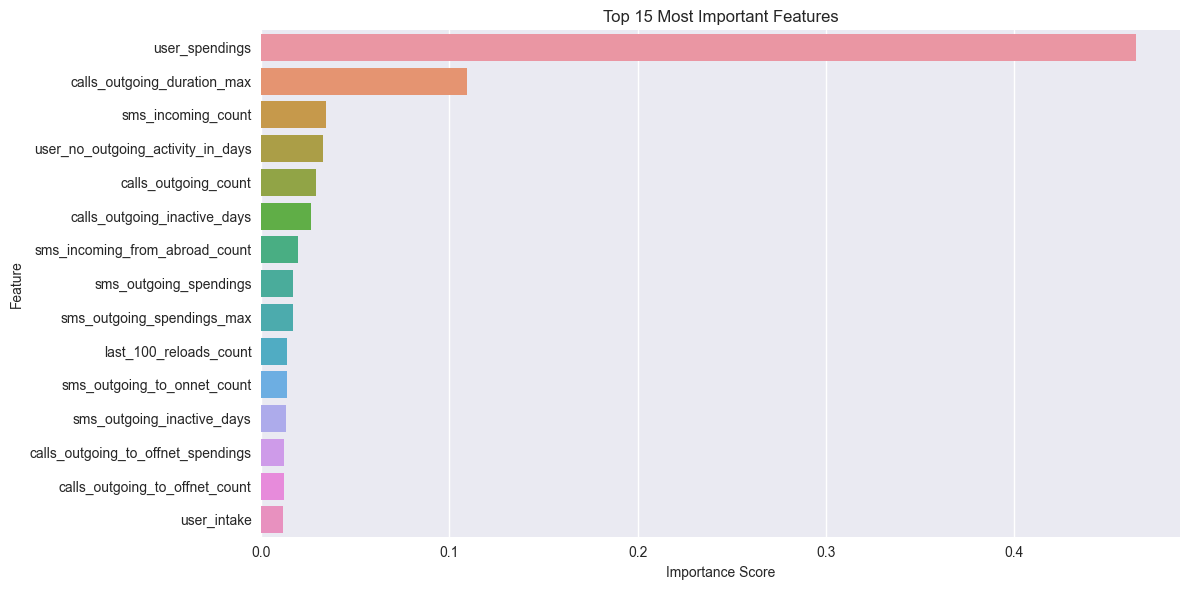

In [16]:
rf_importance = trainer.get_feature_importance()
visualizer.plot_feature_importance(rf_importance)

/Users/enes/anaconda3/envs/sms-span/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/enes/anaconda3/envs/sms-span/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/enes/anaconda3/envs/sms-span/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


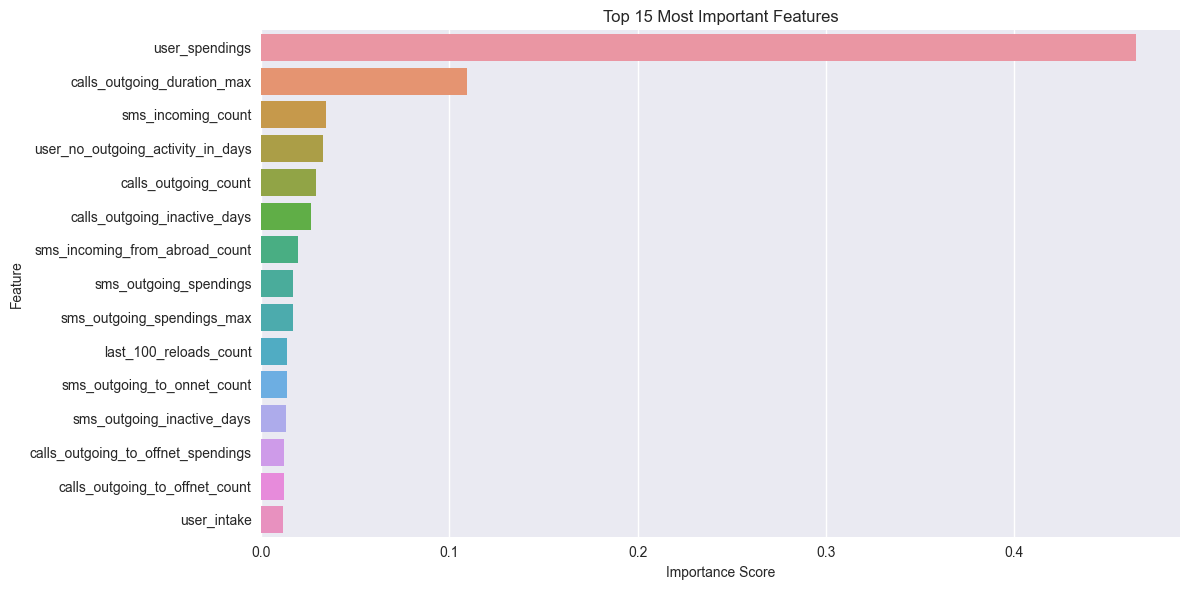

In [17]:
xgb_importance = trainer.get_feature_importance()
visualizer.plot_feature_importance(xgb_importance)